# HOUSING PRICE PROJECT

In [26]:
# Importing necessary libraries 

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 


import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [64]:
# read csv file and convert it to dataframe

d_train = pd.read_csv(r"C:\Users\minal\OneDrive\Desktop\train.csv")
d_test = pd.read_csv(r"C:\Users\minal\OneDrive\Desktop\test.csv")
d_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

In [65]:
# printing the shape of the train and test data

print(d_train.shape,d_test.shape)

(1168, 81) (292, 80)


In [6]:
# observing the data

d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [107]:
d_train.describe()

Id   MSSubClass     MSZoning  LotFrontage        LotArea  \
count  1168.000000  1168.000000  1168.000000  1168.000000    1168.000000   
mean    724.136130    56.767979     3.013699    70.988470   10484.749144   
std     416.159877    41.940650     0.633120    22.437056    8957.442311   
min       1.000000    20.000000     0.000000    21.000000    1300.000000   
25%     360.500000    20.000000     3.000000    60.000000    7621.500000   
50%     714.500000    50.000000     3.000000    70.988470    9522.500000   
75%    1079.500000    70.000000     3.000000    79.250000   11515.500000   
max    1460.000000   190.000000     4.000000   313.000000  164660.000000   

            Street        Alley     LotShape  LandContour  Utilities  ...  \
count  1168.000000  1168.000000  1168.000000  1168.000000     1168.0  ...   
mean      0.996575     0.995719     1.938356     2.773973        0.0  ...   
std       0.058445     0.256832     1.412262     0.710027        0.0  ...   
min       0.000000     0.000000     0.000000     0.000000        0.0  ...   
25%       1.000000     1.000000     0.000000     3.000000        0.0  ...   
50%       1.000000     1.000000     3.000000     3.000000        0.0  ...   
75%       1.000000     1.000000     3.000000     3.000000        0.0  ...   
max       1.000000     2.000000     3.000000     3.000000        0.0  ...   

          PoolArea       PoolQC        Fence  MiscFeature       MiscVal  \
count  1168.000000  1168.000000  1168.000000  1168.000000   1168.000000   
mean      3.448630     2.988870     3.475171     1.070205     47.315068   
std      44.896939     0.157245     1.112090     0.377430    543.264432   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       0.000000     3.000000     4.000000     1.000000      0.000000   
50%       0.000000     3.000000     4.000000     1.000000      0.000000   
75%       0.000000     3.000000     4.000000     1.000000      0.000000   
max     738.000000     3.000000     4.000000     4.000000  15500.000000   

            MoSold       YrSold     SaleType  SaleCondition      SalePrice  
count  1168.000000  1168.000000  1168.000000    1168.000000    1168.000000  
mean      6.344178  2007.804795     7.465753       3.768836  181477.005993  
std       2.686352     1.329738     1.619459       1.112208   79105.586863  
min       1.000000  2006.000000     0.000000       0.000000   34900.000000  
25%       5.000000  2007.000000     8.000000       4.000000  130375.000000  
50%       6.000000  2008.000000     8.000000       4.000000  163995.000000  
75%       8.000000  2009.000000     8.000000       4.000000  215000.000000  
max      12.000000  2010.000000     8.000000       5.000000  755000.000000  

[8 rows x 81 columns]

In [7]:
# finding out the null values

d_train.isna().sum().sort_values(ascending=False).head(30)

PoolQC          1161
MiscFeature     1124
Alley           1091
Fence            931
FireplaceQu      551
LotFrontage      214
GarageYrBlt       64
GarageFinish      64
GarageType        64
GarageQual        64
GarageCond        64
BsmtExposure      31
BsmtFinType2      31
BsmtQual          30
BsmtCond          30
BsmtFinType1      30
MasVnrType         7
MasVnrArea         7
Id                 0
Functional         0
Fireplaces         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
FullBath           0
BsmtHalfBath       0
BsmtFullBath       0
TotRmsAbvGrd       0
GarageCars         0
dtype: int64

In [8]:
# total missing values

df=d_train.isna().sum().sum()
df

5558

In [9]:
# total missing values in percentage

len(d_train)/df*100

21.01475350845628

<AxesSubplot:>

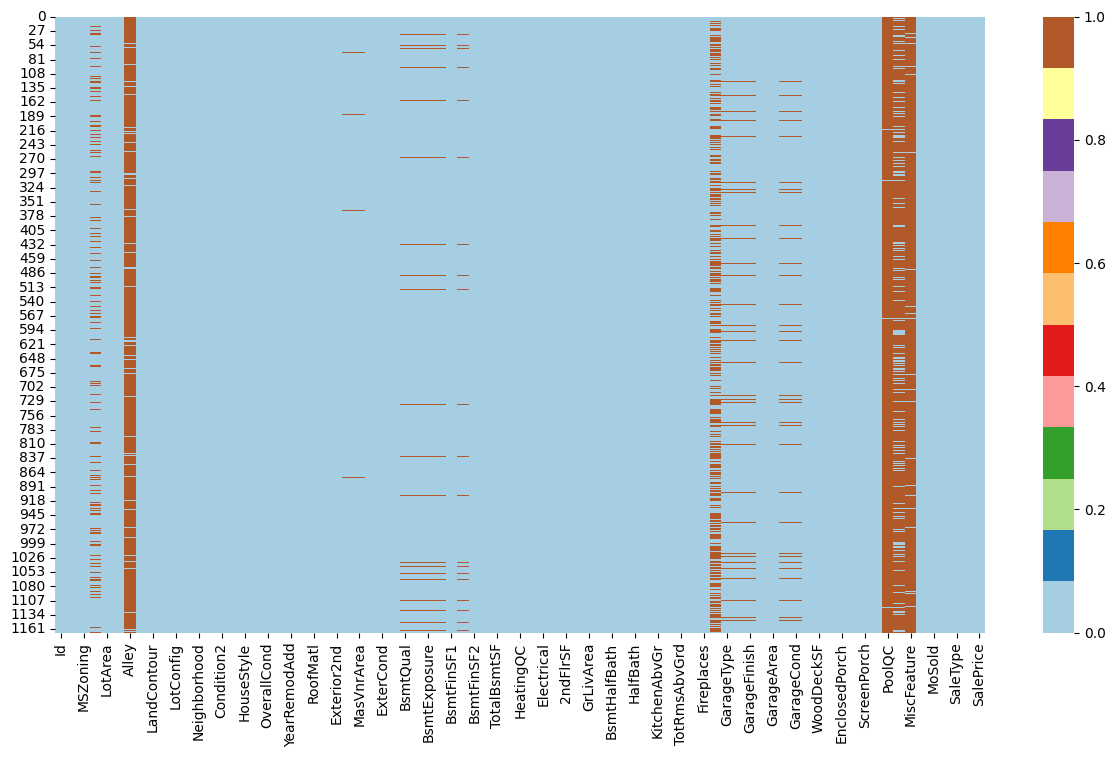

In [10]:
# visiuallizing the missing value in the dataset

plt.figure(figsize=(15,8))
sns.heatmap(d_train.isna(),cmap='Paired')

In [66]:
# dealing with the null values

d_train['PoolQC'] = d_train['PoolQC'].fillna('None')
d_train['MiscFeature'] = d_train['MiscFeature'].fillna('None')
d_train['Alley'] = d_train['Alley'].fillna('None')
d_train['Fence'] = d_train['Fence'].fillna('None')
d_train['FireplaceQu'] = d_train['FireplaceQu'].fillna('None')

In [67]:
d_train.shape

(1168, 81)

In [74]:
# impute lotfrontage column with its mean value

d_train['LotFrontage'] = d_train['LotFrontage'].fillna(d_train['LotFrontage'].mean())

In [75]:
# filling these columns with zero value

d_train['GarageYrBlt'] = d_train['GarageYrBlt'].fillna(0)
d_train['MasVnrArea'] = d_train['MasVnrArea'].fillna(0) 

In [76]:
# filling the missing data with most frequent values

d_train['GarageFinish'] = d_train['GarageFinish'] .fillna(d_train['GarageFinish'] .value_counts().idxmax())
d_train['GarageType'] = d_train['GarageType'] .fillna(d_train['GarageType'] .value_counts().idxmax())
d_train['GarageQual'] = d_train['GarageQual'] .fillna(d_train['GarageQual'] .value_counts().idxmax())
d_train['GarageCond'] = d_train['GarageCond'] .fillna(d_train['GarageCond'] .value_counts().idxmax())
d_train['BsmtExposure'] = d_train['BsmtExposure'] . fillna(d_train['BsmtExposure'] .value_counts().idxmax())
d_train['BsmtFinType2'] = d_train['BsmtFinType2'] .fillna(d_train['BsmtFinType2'].value_counts().idxmax())
d_train['BsmtQual'] = d_train['BsmtQual'] .fillna(d_train['BsmtQual'].value_counts().idxmax())
d_train['BsmtCond'] = d_train['BsmtCond'] .fillna(d_train['BsmtCond'].value_counts().idxmax())
d_train['BsmtFinType1'] = d_train['BsmtFinType1'] .fillna(d_train['BsmtFinType1'].value_counts().idxmax())
d_train['MasVnrType'] = d_train['MasVnrType'] .fillna(d_train['MasVnrType'].value_counts().idxmax())
      

In [77]:
# lets check if we have any missed values left

d_train.isna().sum().sort_values(ascending = False).head(20)

Id              0
CentralAir      0
GarageYrBlt     0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
GarageFinish    0
dtype: int64

<AxesSubplot:>

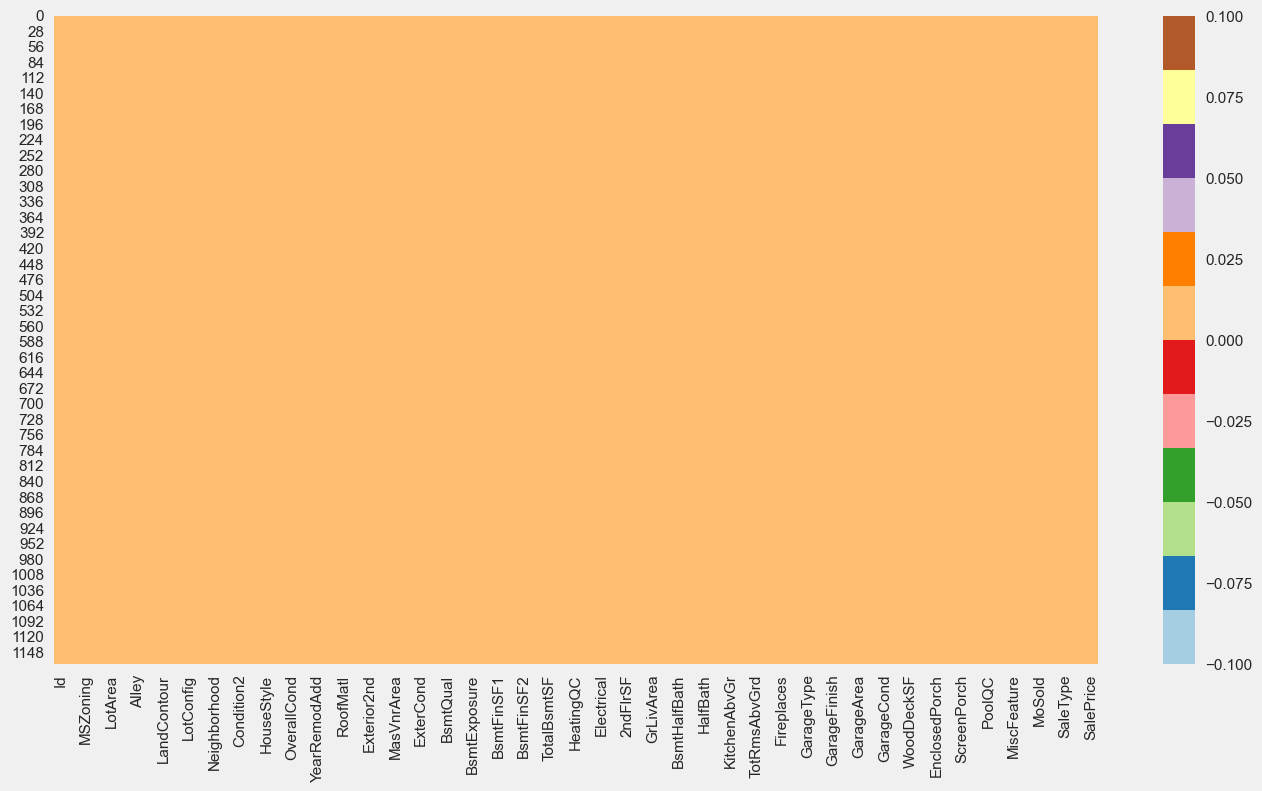

In [78]:
# visualizing missing values in a dataset

plt.figure(figsize=(15,8))
sns.heatmap(d_train.isna(),cmap = 'Paired')

In [79]:
d_train.shape

(1168, 81)

In [80]:
# defining how required variables correlate to our target variable

corr = d_train.corr()
corr.sort_values(['SalePrice'], ascending = False , inplace = True)
corr.SalePrice

SalePrice       1.000000
OverallQual     0.789185
GrLivArea       0.707300
GarageCars      0.628329
GarageArea      0.619000
                  ...   
GarageFinish   -0.550624
KitchenQual    -0.592468
ExterQual      -0.624820
BsmtQual       -0.628798
Utilities            NaN
Name: SalePrice, Length: 81, dtype: float64

In [23]:
# Data Visiualization

!pip install autoviz --no-cache-dir --ignore-installed

  Created wheel for emoji: filename=emoji-2.0.0-py3-none-any.whl size=193021 sha256=c6875ace3bbbfcaf72410cb2a10a6e514e2828d0c0eb99dda99834ac08bb313f
  Stored in directory: C:\Users\minal\AppData\Local\Temp\pip-ephem-wheel-cache-3_wj_sy1\wheels\0e\d1\c5\63b511b700c9da5a62bbfc758dd4a3fd9541df51b5db0694b0
Successfully built emoji
Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000024112554550> (for post_execute):


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\minal\\anaconda3\\Lib\\site-packages\\pywin32_system32\\pythoncom39.dll'
Consider using the `--user` option or check the permissions.



ValueError: Image size of 2000x81500 pixels is too large. It must be less than 2^16 in each direction.

Shape of your Data Set loaded: (1168, 81)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    80 Predictors classified...
        2 variables removed since they were ID or low-information variables

################ Regression problem #####################
Number of variables = 78 exceeds limit, finding top 30 variables through XGBoost
    No categorical feature reduction done. All 75 Categorical vars selected 
    Removing correlated variables from 3 numerics using SULO method
Selecting all (3) variables since none of them are highly correlated...
    Adding 75 categorical variables to reduced numeric variables  of 3
############## F E A T U R E   S E L E C T I O N  ####################
Current number of predictors = 78 
    Finding Imp

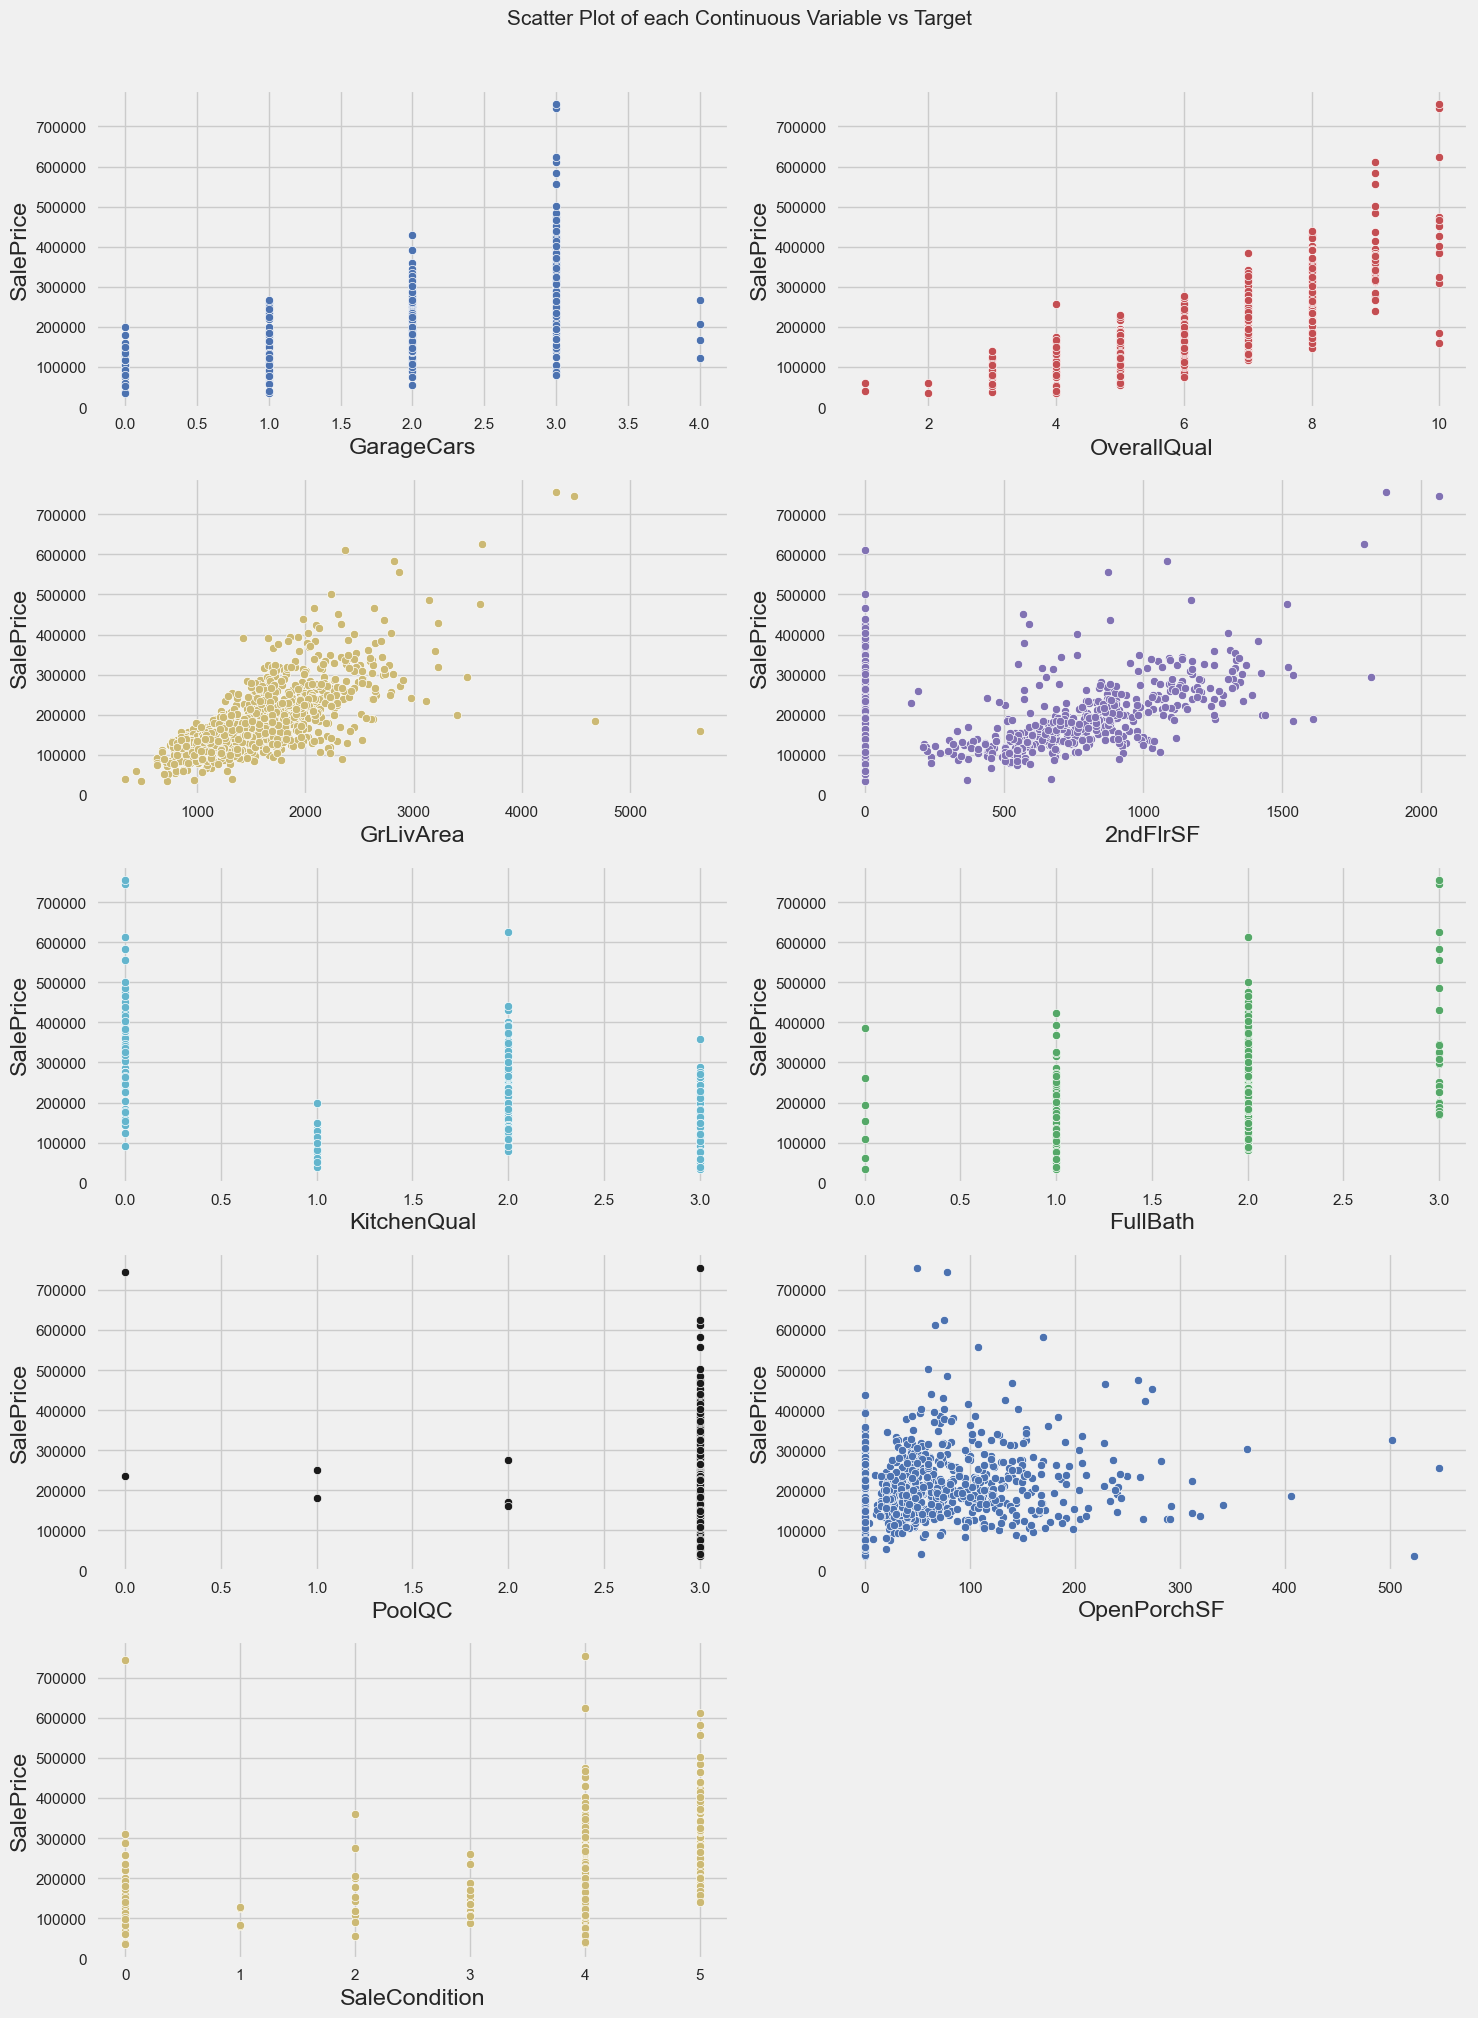

Number of All Scatter Plots = 45


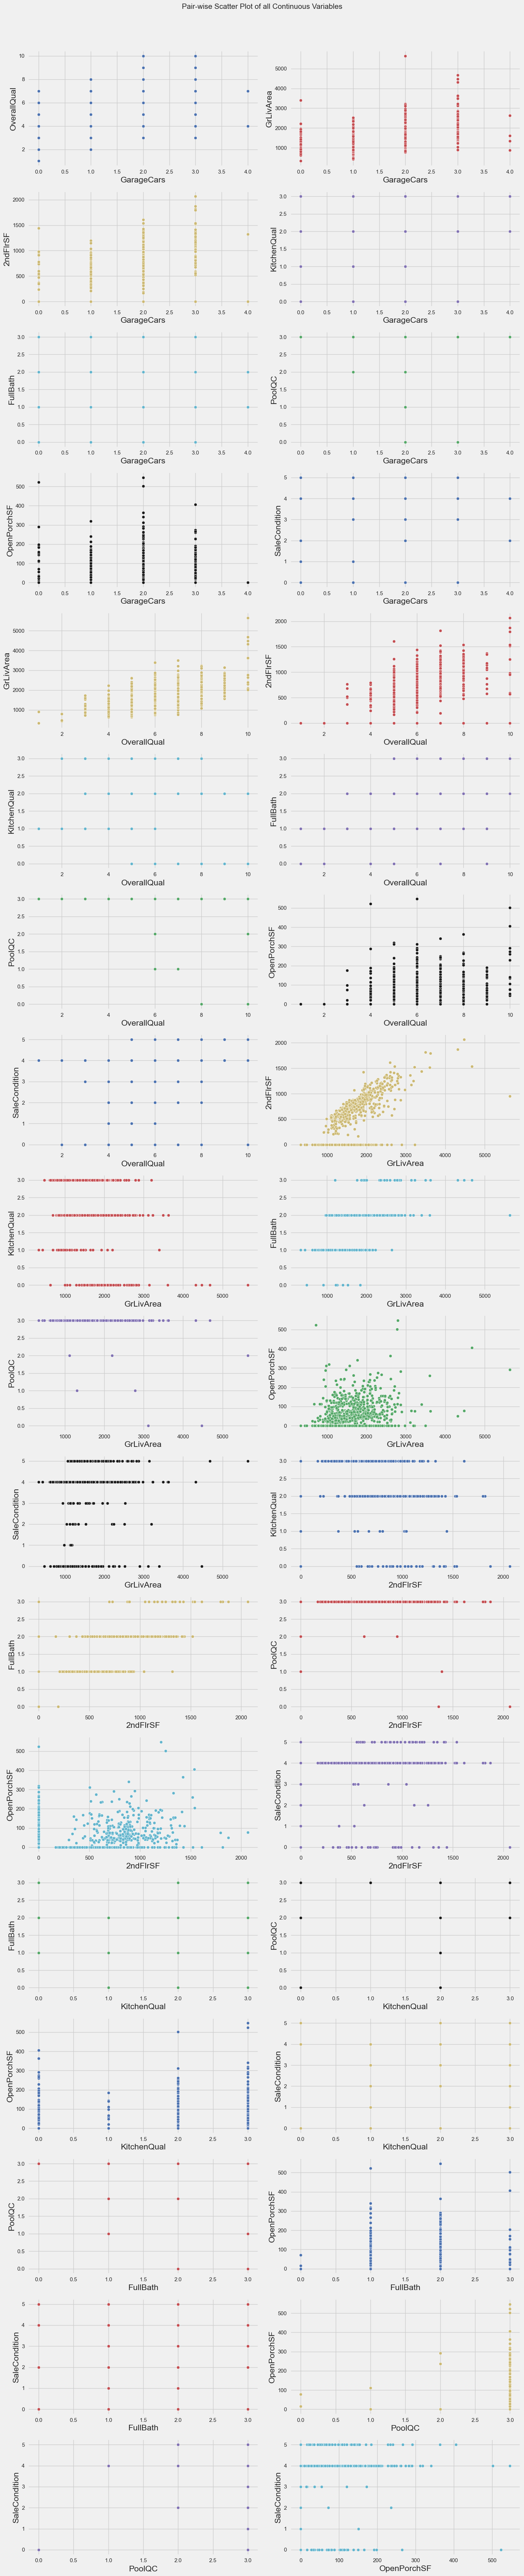

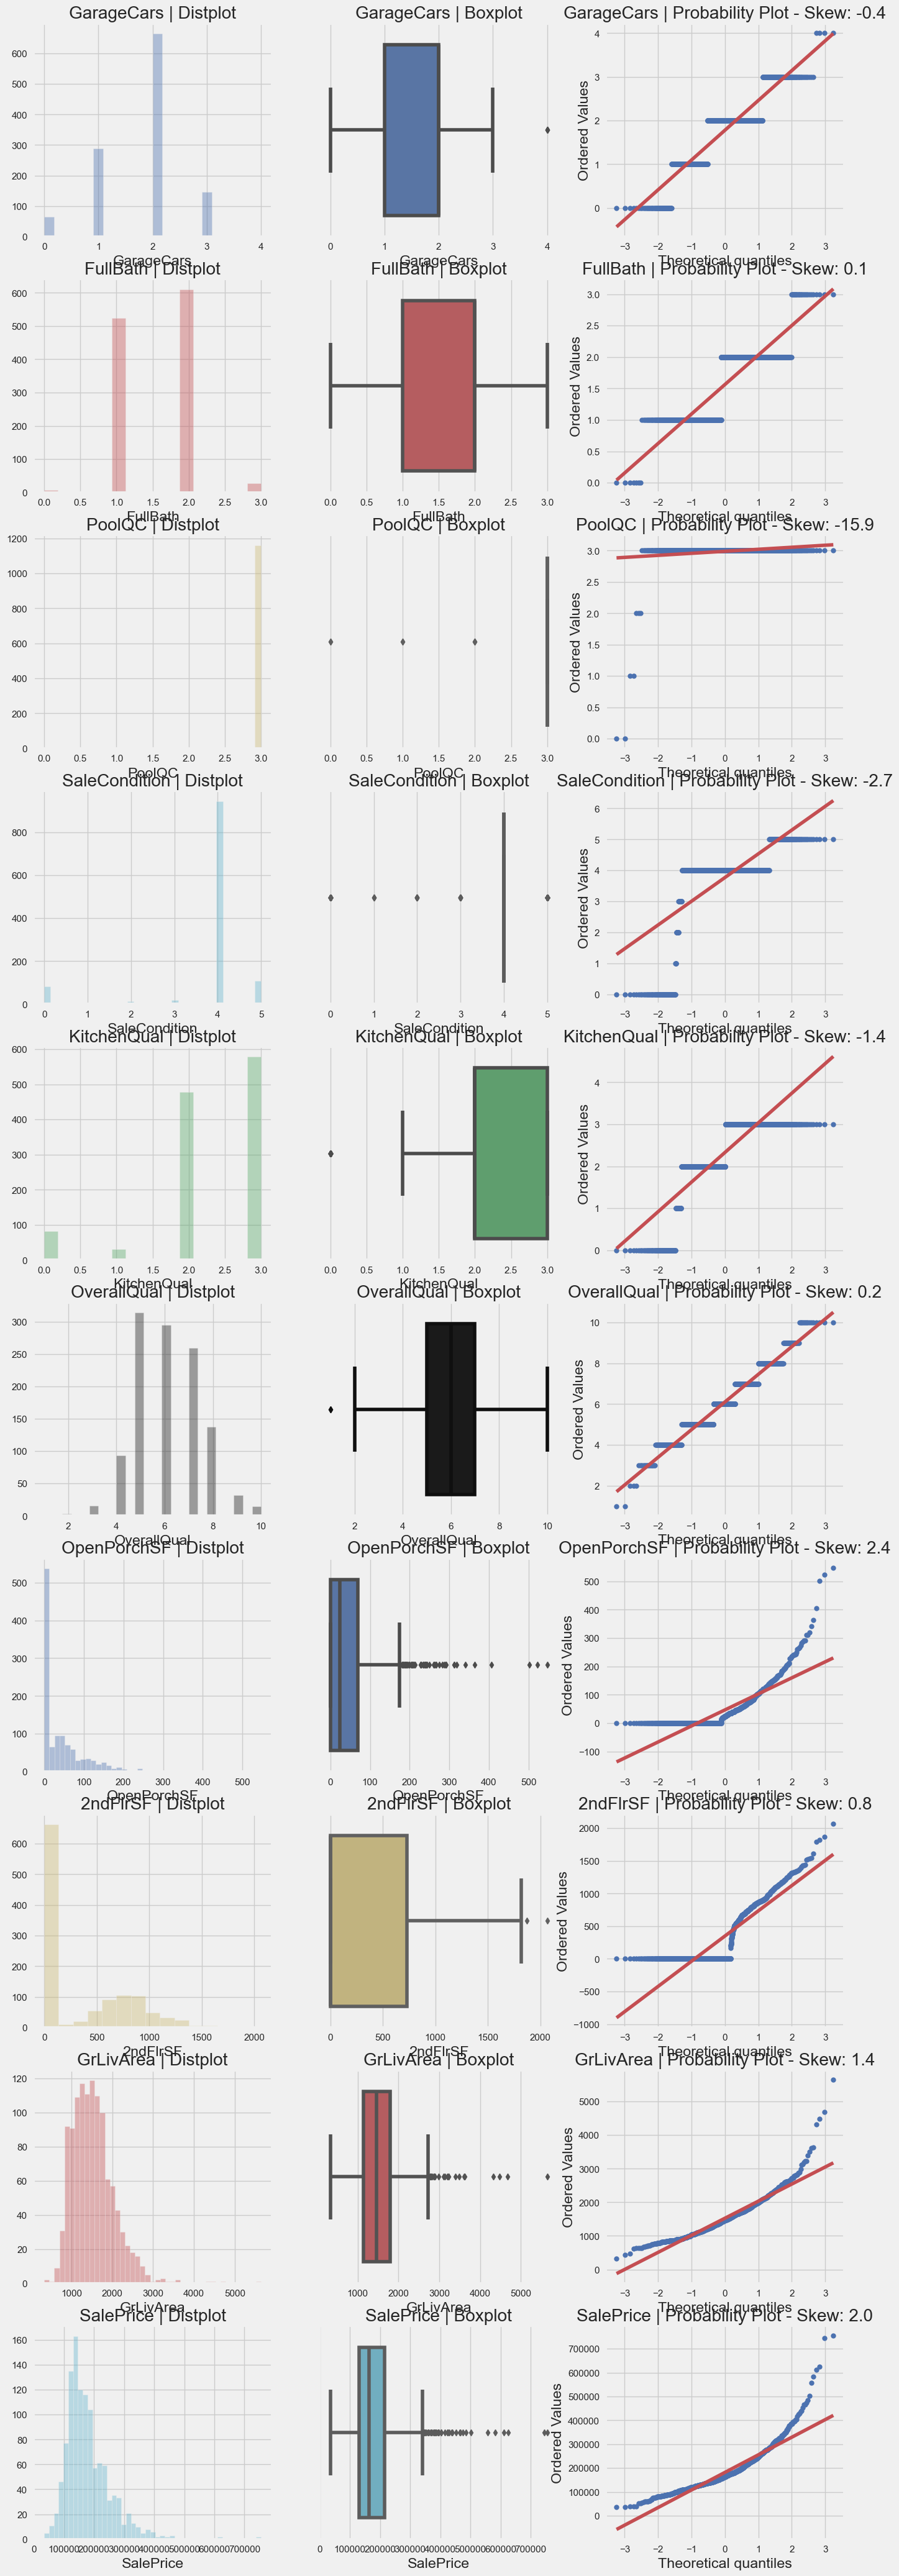

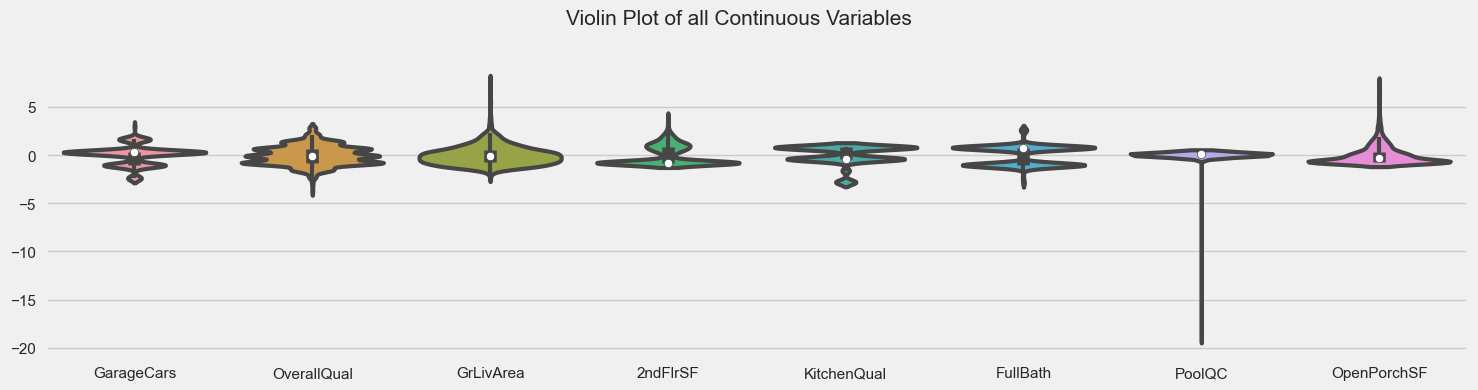

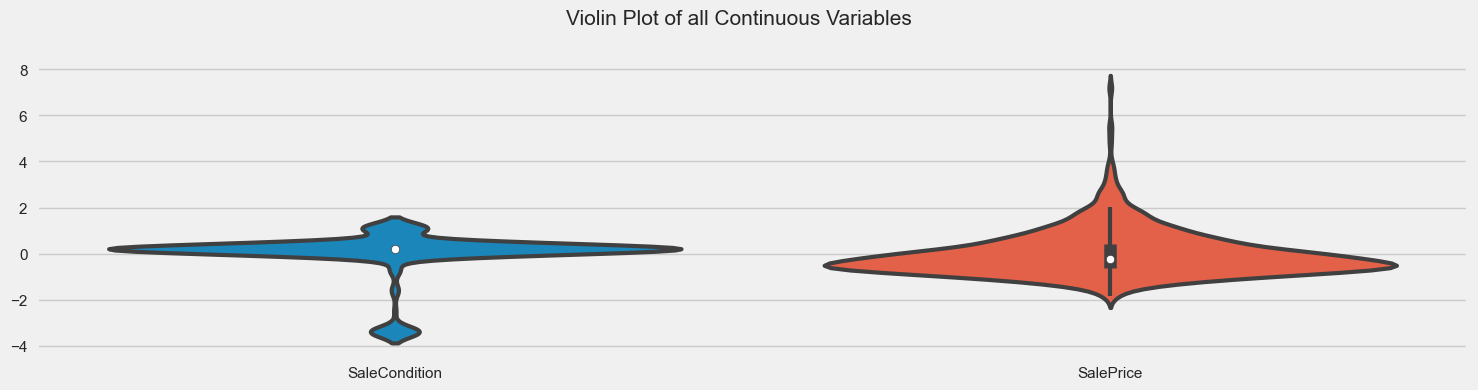

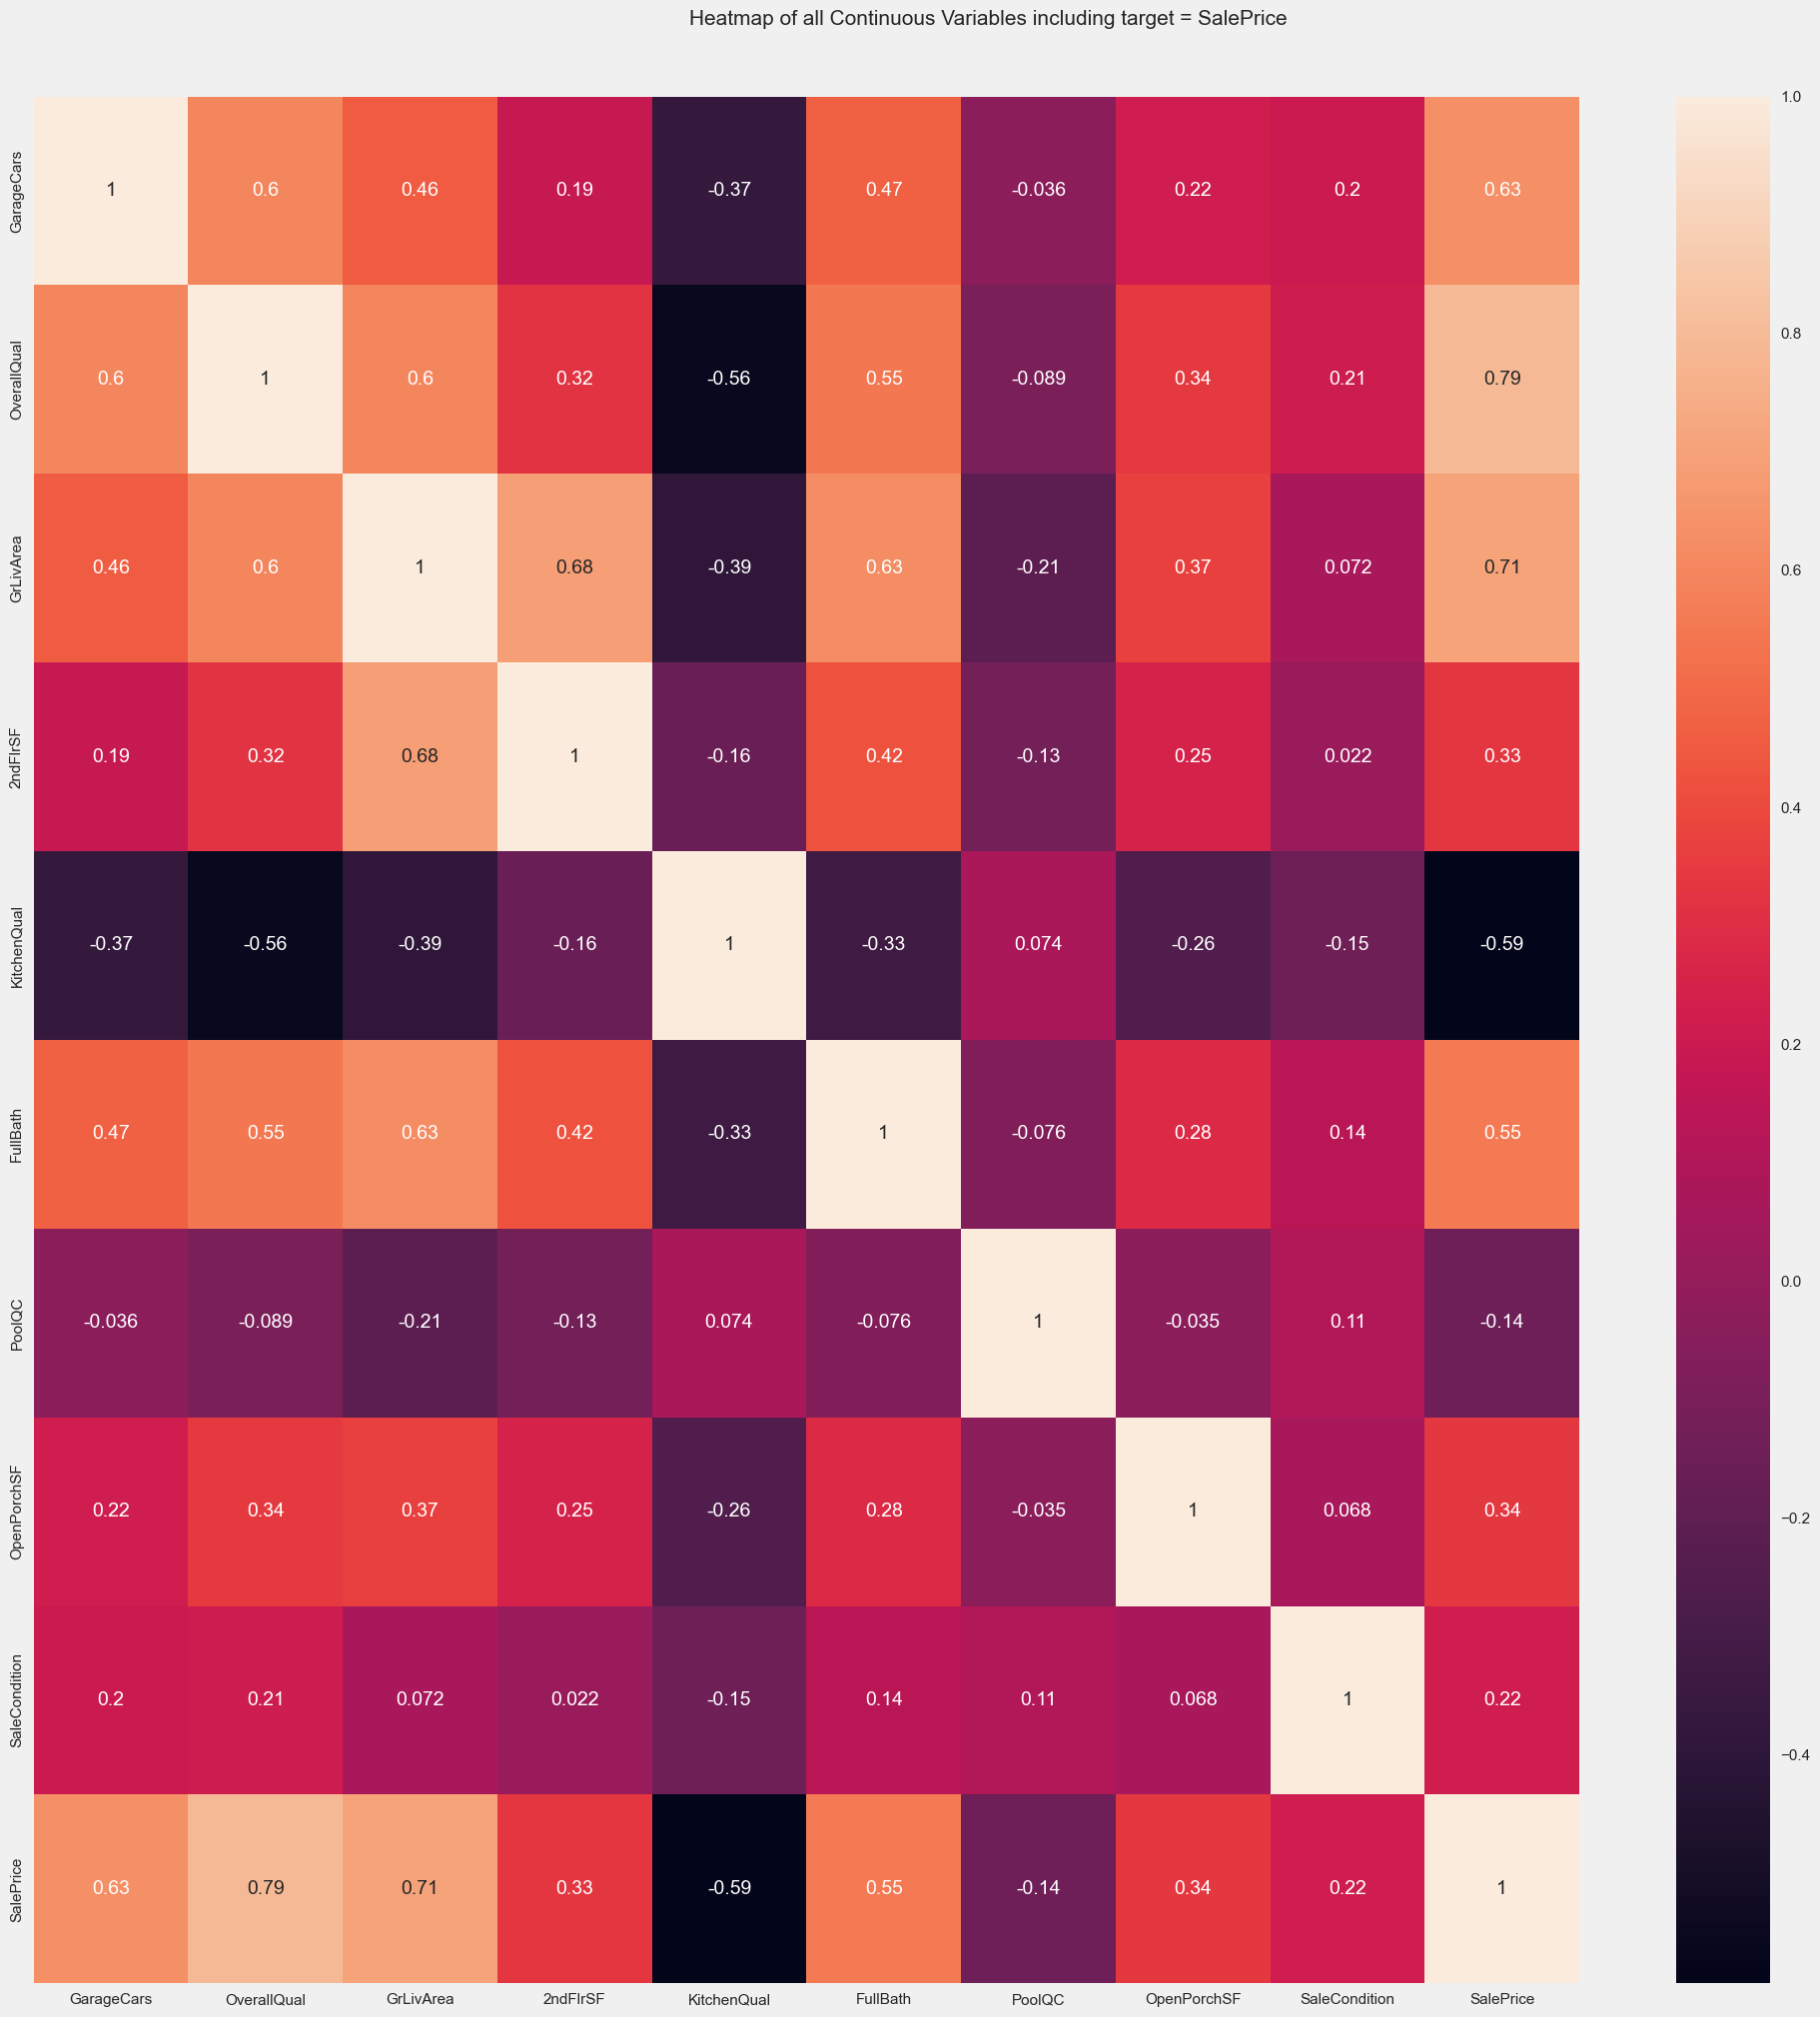

No categorical or boolean vars in data set. Hence no pivot plots...
No categorical or numeric vars in data set. Hence no bar charts.
All Plots done
Time to run AutoViz = 30 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [81]:
# visualizing our SalePrice column with all dataset columns to know how correlated to each other using autoviz

from autoviz.AutoViz_Class import AutoViz_Class
av = AutoViz_Class()

df = av.AutoViz(filename = '', 
                sep =',', 
                dfte =d_train,
                depVar = 'SalePrice', 
                chart_format = 'png')

In [82]:
# Label Encoding

LE = LabelEncoder()
for i in d_train.columns:
    if d_train[i].dtypes == object:
        d_train[i] = LE.fit_transform(d_train[i])
        

In [83]:
# selecting the features

x = d_train.drop('SalePrice',axis = 1)
y = d_train['SalePrice']

In [84]:
# Train Test Split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

In [85]:
# Model instantiating and training

regression = LinearRegression()
regression .fit(x_train,y_train)

LinearRegression()

In [86]:
# prediction using linear regression model

y_pred = regression.predict(x_test)

# using metrics for linear regression

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

# printing

print('Linear Regressor:',r2_score(y_test,y_pred))
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Square Error:', rmse)

Linear Regressor: 0.7562354807999665
Mean Absolute Error: 22033.93003608446
Mean Squared Error: 1627007979.3824098
Root Mean Square Error: 40336.186971284355


In [87]:
from xgboost import XGBRegressor

# prediction using xgboost model


xgboost = XGBRegressor()
xgboost.fit(x_train, y_train)
y_pred_xgboost = xgboost.predict(x_test)

# using matrix for xgboost regressor

mae = mean_absolute_error(y_test,y_pred_xgboost)
mse = mean_squared_error(y_test,y_pred_xgboost)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_xgboost))

# printing

print('XGBoost Regressor:',r2_score(y_test,y_pred_xgboost))
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Square Error:', rmse)

XGBoost Regressor: 0.847158386447978
Mean Absolute Error: 18797.400195868944
Mean Squared Error: 1020142413.0423167
Root Mean Square Error: 31939.668330186472


I will go with XGBoost Regressor because its giving me better accuracy

In [88]:
d_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0           HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3           Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
..          ...       ...  ...         ...      ...    ...   ...         ...   
287         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
288         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
289         Lvl    AllPub  ...           0        0    NaN   NaN        Shed   
290         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
291         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         0      7    2007        WD         Normal  
1         0      8    2009       COD        Abnorml  
2         0      6    2009        WD         Normal  
3         0      7    2009        WD         Normal  
4         0      1    2008        WD         Normal  
..      ...    ...     ...       ...            ...  
287       0     10    2008        WD         Normal  
288       0      2    2008        WD         Normal  
289     700      3    2010        WD         Normal  
290       0     10    2006        WD         Normal  
291       0      6    2006        WD         Normal  

[292 rows x 80 columns]

In [89]:
# now its time to implement our model into d_test

d_test.shape

(292, 80)

In [90]:
# i will be using the same metod with d_test to fill missing values

d_test.isna().sum().sort_values(ascending= False).head(20)

PoolQC          292
MiscFeature     282
Alley           278
Fence           248
FireplaceQu     139
LotFrontage      45
GarageType       17
GarageYrBlt      17
GarageQual       17
GarageCond       17
GarageFinish     17
BsmtCond          7
BsmtFinType2      7
BsmtFinType1      7
BsmtQual          7
BsmtExposure      7
MasVnrArea        1
MasVnrType        1
Electrical        1
HalfBath          0
dtype: int64

In [91]:
d_test['PoolQC']= d_test['PoolQC'].fillna('None')
d_test['MiscFeature']= d_test['MiscFeature'].fillna('None')
d_test['Alley']= d_test['Alley'].fillna('None')
d_test['Fence']= d_test['Fence'].fillna('None')
d_test['FireplaceQu']= d_test['FireplaceQu'].fillna('None')

In [92]:
# Impute "LotFrotage" column with its mean values

d_test['LotFrontage'] = d_test['LotFrontage'].fillna(d_test['LotFrontage'].mean())

In [93]:
# Filling these columns with zero values

d_test['GarageYrBlt']= d_test['GarageYrBlt'].fillna(0)
d_test['MasVnrArea']= d_test['MasVnrArea'].fillna(0)

In [94]:
# Filling the missing data with most_frequent values

d_test['GarageType'] = d_test['GarageType'].fillna(d_train['GarageType'].value_counts().idxmax())
d_test['GarageCond'] = d_test['GarageCond'].fillna(d_train['GarageCond'].value_counts().idxmax())
d_test['GarageQual'] = d_test['GarageQual'].fillna(d_train['GarageQual'].value_counts().idxmax())
d_test['GarageFinish'] = d_test['GarageFinish'].fillna(d_train['GarageFinish'].value_counts().idxmax())
d_test['BsmtCond'] = d_test['BsmtCond'].fillna(d_train['BsmtCond'].value_counts().idxmax())
d_test['BsmtFinType2'] = d_test['BsmtFinType2'].fillna(d_train['BsmtFinType2'].value_counts().idxmax())
d_test['BsmtFinType1'] = d_test['BsmtFinType1'].fillna(d_train['BsmtFinType1'].value_counts().idxmax())
d_test['BsmtQual'] = d_test['BsmtQual'].fillna(d_train['BsmtQual'].value_counts().idxmax())
d_test['BsmtExposure'] = d_test['BsmtExposure'].fillna(d_train['BsmtExposure'].value_counts().idxmax())
d_test['MasVnrType'] = d_test['MasVnrType'].fillna(d_train['MasVnrType'].value_counts().idxmax())
d_test['Electrical'] = d_test['Electrical'].fillna(d_train['Electrical'].value_counts().idxmax())          


In [95]:
# checking the null values

d_test.isna().sum().sort_values(ascending= False)

Id               0
MSSubClass       0
GarageType       0
FireplaceQu      0
Fireplaces       0
                ..
MasVnrType       0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
SaleCondition    0
Length: 80, dtype: int64

In [96]:
# Label Encoding

LE = LabelEncoder()
for i in d_test.columns:
    if d_test[i].dtypes == object:
        d_test[i] = LE.fit_transform(d_test[i].astype(str))

In [97]:
# i will be using the xgboost for the prediction of test data

xgboost_test = XGBRegressor()
xgboost_test.fit(x_train,y_train)
y_pred_xgboost_test = xgboost_test.predict(d_test)
y_pred_xgboost_test.shape

(292,)

In [98]:
y_pred_xgboost_test

array([404012.84 , 221942.58 , 280661.06 , 189569.23 , 215930.08 ,
        67972.34 , 138170.44 , 318812.2  , 243783.95 , 172895.25 ,
        56060.6  , 141424.03 , 111938.18 , 176457.9  , 310979.94 ,
       139657.95 , 109148.76 , 111333.4  , 160499.61 , 161349.17 ,
       155601.05 , 137169.72 , 140918.28 , 112548.52 , 107595.65 ,
       125424.21 , 176510.67 , 147010.38 , 181333.02 , 107235.86 ,
       178034.72 , 184360.95 , 259598.78 , 163017.52 , 105051.836,
       166272.8  , 207978.84 , 111168.13 , 168875.27 , 150503.42 ,
        91321.945, 296651.7  , 209471.94 , 182373.5  , 135880.8  ,
       138466.98 ,  79760.48 , 100386.39 , 204733.25 , 353466.   ,
       162563.95 , 194878.56 ,  92791.414, 104960.11 , 305496.22 ,
       131338.23 , 148787.12 , 186835.48 , 107696.49 , 258470.89 ,
        95690.664, 163072.1  , 115971.27 , 148352.61 , 200864.94 ,
        84516.23 , 152379.58 , 174697.11 , 134967.11 , 161621.95 ,
       381569.06 , 155464.89 , 186393.75 , 152292.66 , 151878.

In [99]:
id_test = d_test['Id']
d_test = pd.DataFrame(d_test, columns=['ID'])

In [103]:
prediction = pd.DataFrame(y_pred_xgboost_test, columns=["SalePrice"])

In [104]:
output = pd.concat([id_test, prediction],axis=1)

In [105]:
output

Id      SalePrice
0     337  404012.843750
1    1018  221942.578125
2     929  280661.062500
3    1148  189569.234375
4    1227  215930.078125
..    ...            ...
287    83  242372.765625
288  1048  141255.015625
289    17  139436.296875
290   523  142422.718750
291  1379  104713.750000

[292 rows x 2 columns]

In [106]:
output.to_csv('Submission.csv', index=False)